1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Covariance matrix: 
 [[ 1.01024828  1.18568227  3.20617883]
 [ 1.18568227 10.55123651 12.92260105]
 [ 3.20617883 12.92260105 19.3349587 ]] 

Eigenvalues with cov matrix:
 [ 2.89806420e+01  1.91580147e+00 -2.11958465e-15] 

Eigenvectors with cov matrix:
 [[-0.11718258 -0.81649658  0.56533316]
 [-0.80957146  0.40824829  0.4218144 ]
 [-0.57520631 -0.40824829 -0.70885191]] 

Eigenvalues with SVD:
 [2.90595159e+01 1.91580192e+00 2.32965792e-31] 

Eigenvectors with SVD:
 [[-0.11718651  0.56533234 -0.81649658]
 [-0.57520138 -0.70885592 -0.40824829]
 [-0.80957439  0.42180877  0.40824829]] 

Trace of the covariance matrix:
 30.896443496130473 

Trace of the diagonal eigenvalues matrix:
 30.896443496130473 

By selecting the component 0, we retain 93.80% of the total variability
By selecting the component 1, we retain 6.20% of the total variability
By selecting the component 2, we retain -0.00% of the total variability
In the new basis, we retain 100.00% of the total variability


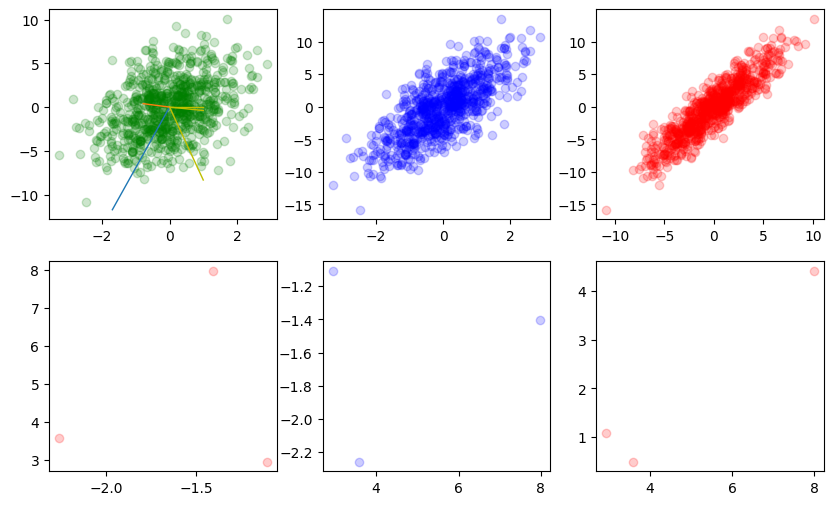

In [23]:
import numpy as np
from scipy import linalg as la
import pandas as pd
import matplotlib.pyplot as plt

N = 800
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2*x1 + x2
data = {'x1' : x1, 'x2' : x2, 'x3' : x3}
df = np.array(pd.DataFrame(data))


#Covariance matrix eigendecomposition
cov = np.cov(df, rowvar=False)
print('Covariance matrix: \n', cov, '\n')

eig_values_cov, eig_vecs_cov = la.eig(cov)
eig_values_cov = np.real_if_close(eig_values_cov)

index = eig_values_cov.argsort()[::-1]
eig_values_cov = eig_values_cov[index]
eig_vecs_cov = eig_vecs_cov[index]

print("Eigenvalues with cov matrix:\n", eig_values_cov, '\n')
print("Eigenvectors with cov matrix:\n", eig_vecs_cov, '\n')


#SVD eigendecomposition
U, S, eig_vecs_svd = np.linalg.svd(df)
eig_values_svd = S**2/(N-1) #Rescaling the spectrum to get the eigenvalues
print("Eigenvalues with SVD:\n", eig_values_svd, '\n')
print("Eigenvectors with SVD:\n", eig_vecs_svd.T, '\n')

#The two procedures actually yield the same result. The fact that the eigenvectors
#retrieved with SVD method have complementary signs for each component is fine.
# in fact this just means that are antiparallel with respect to the ones obtained via eiegnedecomposition
# therefore thay are actually spanning the same eigenspace.

Lambda = np.diag(eig_values_cov)
print("Trace of the covariance matrix:\n", cov.trace(), '\n')
print("Trace of the diagonal eigenvalues matrix:\n", Lambda.trace(), '\n')

print("By selecting the component 0, we retain %.2f%% of the total variability" % ((Lambda[0, 0]/Lambda.trace())*100))
print("By selecting the component 1, we retain %.2f%% of the total variability" % ((Lambda[1, 1]/Lambda.trace())*100))
print("By selecting the component 2, we retain %.2f%% of the total variability" % ((Lambda[2, 2]/Lambda.trace())*100))

#The fact that the variable x3 yields the lowest variability is actually consistent
# with how the data has been defined. In fact x3 is completely dependent on the other two variables.


Lambda_new = np.zeros((Lambda.shape))
var = 0
i = 0
for el in eig_values_cov:
    var = var+el
    Lambda_new[i,i] = el
    if abs((var)/Lambda.trace()) >= 0.99:
        print("In the new basis, we retain %.2f%% of the total variability" % (abs((var)/Lambda.trace())*100))
        break
    i += 1

df_array = np.array([x1, x2, x3])
#Rewriting the data sets in the new basis
df_new = np.dot(eig_vecs_cov.T, df_array)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

axs[1, 0].scatter(df_new[:, 0], df_new[:, 1], alpha=0.2, c='r')
axs[1, 1].scatter(df_new[:, 1], df_new[:, 0], alpha=0.2, c='b')
axs[1, 2].scatter(df_new[:, 1], df_new[:, 2], alpha=0.2, c='r')

axs[0, 0].scatter(df[:, 0], df[:, 1], alpha=0.2, c='g')
axs[0, 1].scatter(df[:, 0], df[:, 2], alpha=0.2, c='b')
axs[0, 2].scatter(df[:, 1], df[:, 2], alpha=0.2, c='r')


scale_factor = 0.5
for eig_value, eig_vec in zip(eig_values_cov, eig_vecs_cov.T):
    axs[0, 0].plot([0, scale_factor*eig_value*eig_vec[0]], [0, scale_factor*eig_value*eig_vec[1]], [0, scale_factor*eig_value*eig_vec[2]], 'y-', lw=1)

#For the orginal 3D space the space is spanned by three vectors. One of the three actually does not
# belong to the plane spanned by the other two, i.e. the blue one, but actually is possible to make
# its decomposition on that plane. This is the reason why there are 5 vectors. Two of them are the 
# decomposition of the blue vector projection on the plane.

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [2]:
import numpy as np
from scipy import linalg as la
import pandas as pd
import matplotlib.pyplot as plt

N = 800
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2*x1 + x2

x4 = np.random.normal(0, 1/scale_factor, N)
x5 = np.random.normal(0, 1/scale_factor, N)
x6 = np.random.normal(0, 1/scale_factor, N)
x7 = np.random.normal(0, 1/scale_factor, N)
x8 = np.random.normal(0, 1/scale_factor, N)
x9 = np.random.normal(0, 1/scale_factor, N)
x10 = np.random.normal(0, 1/scale_factor, N)
x11 = np.random.normal(0, 1/scale_factor, N)
x12 = np.random.normal(0, 1/scale_factor, N)
x13 = np.random.normal(0, 1/scale_factor, N)

data = {'x1' : x1, 'x2' : x2, 'x3' : x3, 'x4' : x4, 'x5' : x5, 'x6' : x6, 'x7' : x7, 'x8' : x8, 'x9' : x9, 'x10' : x10, 'x11' : x11, 'x12' : x12, 'x13' : x13}
df = np.array(pd.DataFrame(data))
df

#Covariance matrix eigendecomposition
cov = np.cov(df, rowvar=False)
print('Covariance matrix: \n', cov, '\n')

eig_values_cov, eig_vecs_cov = la.eig(cov)
eig_values_cov = np.real_if_close(eig_values_cov)
print("Eigenvalues with cov matrix:\n", eig_values_cov, '\n')
print("Eigenvectors with cov matrix:\n", eig_vecs_cov, '\n')

#SVD eigendecomposition
U, S, eig_vecs_svd = np.linalg.svd(df)
eig_values_svd = S**2/(N-1) #Rescaling the spectrum to get the eigenvalues
print("Eigenvalues with SVD:\n", eig_values_svd, '\n')
print("Eigenvectors with SVD:\n", eig_vecs_svd.T, '\n')

Lambda = np.diag(eig_values_cov)
print("Trace of the covariance matrix:\n", cov.trace(), '\n')
print("Trace of the diagonal eigenvalues matrix:\n", Lambda.trace(), '\n')

print("By selecting the component 0, we retain %.2f%% of the total variability" % ((Lambda[0, 0]/Lambda.trace())*100))
print("By selecting the component 1, we retain %.2f%% of the total variability" % ((Lambda[1, 1]/Lambda.trace())*100))
print("By selecting the component 2, we retain %.2f%% of the total variability" % ((Lambda[2, 2]/Lambda.trace())*100))
print("By selecting the component 3, we retain %.2f%% of the total variability" % ((Lambda[3, 3]/Lambda.trace())*100))
print("By selecting the component 4, we retain %.2f%% of the total variability" % ((Lambda[4, 4]/Lambda.trace())*100))
print("By selecting the component 5, we retain %.2f%% of the total variability" % ((Lambda[5, 5]/Lambda.trace())*100))
print("By selecting the component 6, we retain %.2f%% of the total variability" % ((Lambda[6, 6]/Lambda.trace())*100))
print("By selecting the component 7, we retain %.2f%% of the total variability" % ((Lambda[7, 7]/Lambda.trace())*100))
print("By selecting the component 8, we retain %.2f%% of the total variability" % ((Lambda[8, 8]/Lambda.trace())*100))
print("By selecting the component 9, we retain %.2f%% of the total variability" % ((Lambda[9, 9]/Lambda.trace())*100))
print("By selecting the component 10, we retain %.2f%% of the total variability" % ((Lambda[10, 10]/Lambda.trace())*100))
print("By selecting the component 11, we retain %.2f%% of the total variability" % ((Lambda[11, 11]/Lambda.trace())*100))
print("By selecting the component 12, we retain %.2f%% of the total variability" % ((Lambda[12, 12]/Lambda.trace())*100))


Covariance matrix: 
 [[ 9.88441569e-01  9.80303406e-01  2.95718654e+00  1.47853230e-01
  -2.87006818e-02 -1.00253258e-02  6.65822651e-02 -1.20668519e-01
   4.36913923e-02  4.04839051e-02  4.35756427e-02 -6.20497584e-02
  -1.12366012e-01]
 [ 9.80303406e-01  1.08339548e+01  1.27945616e+01  1.34614562e-01
  -4.17750464e-01 -6.84105941e-02 -2.23935685e-01 -2.80397370e-01
   2.57779809e-02  6.62703231e-03  9.13807857e-02 -1.78940908e-01
  -3.54702324e-02]
 [ 2.95718654e+00  1.27945616e+01  1.87089347e+01  4.30321023e-01
  -4.75151827e-01 -8.84612457e-02 -9.07711550e-02 -5.21734409e-01
   1.13160766e-01  8.75948425e-02  1.78532071e-01 -3.03040425e-01
  -2.60202256e-01]
 [ 1.47853230e-01  1.34614562e-01  4.30321023e-01  3.93244542e+00
   9.93344396e-02 -6.45988230e-02 -1.25278943e-01 -9.64575920e-02
  -3.69793064e-02 -4.88023108e-02  1.89182612e-01 -1.46974377e-01
   1.38516290e-01]
 [-2.87006818e-02 -4.17750464e-01 -4.75151827e-01  9.93344396e-02
   4.03564395e+00  2.23212939e-01 -4.18166352

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [3]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 